Install required dependancies

In [75]:
! pip install pandas matplotlib scikit-learn xgboost


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from xgboost import  XGBClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [77]:
df=pd.read_csv("dataset.csv")
df.head()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,temperature,humidity,rain,moisture,pressure
0,0,2.000000,3.333333,1.666667,4.000000,2.666667,2.333333,3.000000,2.666667,3.000000,2.666667,2.666667,2.333333,18.212550,84.334223,26668.91667,31.248533,1017.904157
1,0,4.000000,2.666667,2.333333,2.000000,2.333333,1.666667,2.333333,2.666667,2.666667,4.333333,3.333333,2.000000,19.171867,73.905807,27103.16667,75.938967,1013.189603
2,0,3.000000,2.666667,3.000000,2.000000,2.000000,2.000000,2.666667,3.000000,3.000000,5.000000,3.333333,2.000000,22.785017,78.169993,26689.16667,51.231067,1016.092942
3,0,3.000000,2.666667,2.666667,2.666667,3.000000,1.333333,3.333333,2.666667,2.666667,5.000000,3.000000,2.666667,23.298793,81.467820,18678.75000,72.093500,1017.477364
4,0,2.666667,3.666667,2.333333,3.666667,1.666667,3.666667,2.666667,3.000000,3.000000,3.666667,2.000000,3.333333,22.453283,80.013987,26713.91667,53.482733,1013.225318


In [78]:
ls=df[df['Landslide']==1]
req_ln=len(ls)
nls=df[df['Landslide']==0][:req_ln]
df=pd.concat([ls,nls],ignore_index=True)
df.head()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,temperature,humidity,rain,moisture,pressure
0,1,2.333333,1.000000,2.000000,1.333333,3.000000,2.000000,2.000000,4.000000,1.333333,3.333333,4.333333,1.000000,19.938997,64.192373,51195.41667,47.002633,1019.368506
1,1,2.333333,2.666667,1.666667,3.000000,1.333333,3.333333,3.000000,2.666667,2.666667,4.000000,3.666667,3.333333,17.961213,60.160237,53333.33333,54.497300,1020.598743
2,1,2.000000,3.000000,2.000000,3.000000,1.333333,2.333333,2.000000,3.666667,3.333333,3.666667,3.666667,3.000000,17.993850,70.468177,53506.91667,47.753067,1019.843108
3,1,4.000000,3.666667,2.000000,1.333333,2.333333,1.666667,3.333333,3.000000,4.000000,3.333333,3.333333,2.666667,21.293337,69.015607,51537.41667,52.457967,1017.452234
4,1,3.000000,3.333333,2.000000,2.333333,2.000000,2.333333,4.000000,2.000000,3.333333,3.666667,3.000000,2.333333,23.379700,49.429987,40401.75000,35.850400,1021.457007


In [79]:
x=df[df.columns[1:]]
y=df[df.columns[0]]

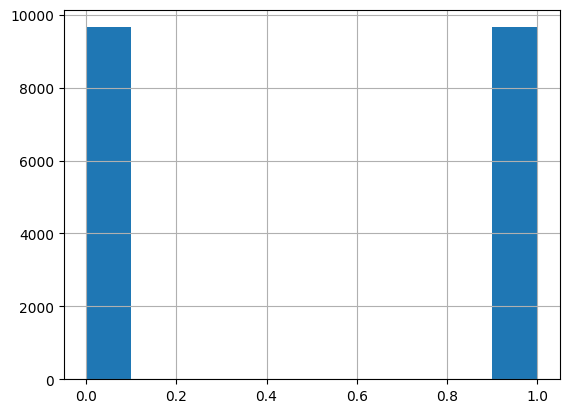

In [80]:
y.hist()
plt.show()

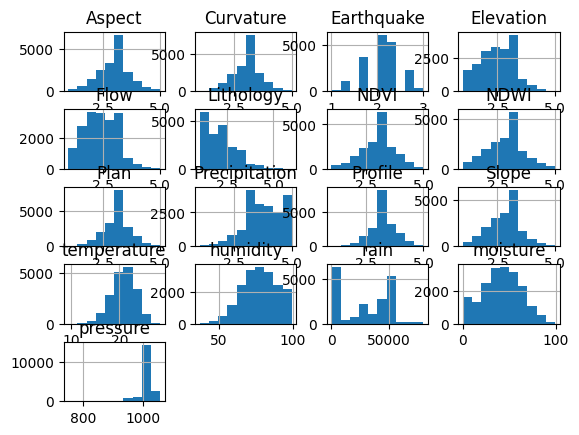

In [81]:
x.hist()
plt.show()

In [82]:
seed = 42
train_x, test_x, train_y, test_y = train_test_split(
    x, y, train_size=0.8, random_state=seed, stratify=y
)
model_res = [[], [], []]


SVM with linear Kernel

In [83]:
svm=LinearSVC()
svm.fit(train_x,train_y)

c:\Users\rv1n\Desktop\test\landslide\landslide-venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [84]:
test_y_svm=svm.predict(test_x)
train_y_svm=svm.predict(train_x)
acc_test_svm=accuracy_score(test_y,test_y_svm)
acc_train_svm=accuracy_score(train_y,train_y_svm)
model_res[0].append("SVM")
model_res[1].append(acc_test_svm)
model_res[2].append(acc_train_svm)
acc_test_svm,acc_train_svm

(0.9878301398239254, 0.989641331088955)

Using Xgboost

In [85]:
xgb=XGBClassifier()
xgb.fit(train_x,train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [86]:
test_y_xgb=xgb.predict(test_x)
train_y_xgb=xgb.predict(train_x)   
acc_test_xgb = accuracy_score(test_y, test_y_xgb)
acc_train_xgb = accuracy_score(train_y, train_y_xgb)
model_res[0].append("XGB")
model_res[1].append(acc_test_xgb)
model_res[2].append(acc_train_xgb)
acc_test_xgb, acc_train_xgb

(0.9893837389953392, 1.0)

Using Neural Network

In [87]:
mlp=MLPClassifier()
mlp.fit(train_x,train_y)

MLPClassifier()

In [88]:
test_y_mlp = mlp.predict(test_x)
train_y_mlp = mlp.predict(train_x)
acc_test_mlp = accuracy_score(test_y, test_y_mlp)
acc_train_mlp = accuracy_score(train_y, train_y_mlp)
model_res[0].append("MLP")
model_res[1].append(acc_test_mlp)
model_res[2].append(acc_train_mlp)
acc_test_mlp, acc_train_mlp


(0.9878301398239254, 0.9899002978117312)

K-Nearest Neighbours Classifier

In [89]:
knc=KNeighborsClassifier()
knc.fit(train_x,train_y)

KNeighborsClassifier()

In [90]:
test_y_knc=knc.predict(test_x)
train_y_knc=knc.predict(train_x)
acc_test_knc = accuracy_score(test_y, test_y_knc)
acc_train_knc = accuracy_score(train_y, train_y_knc)
model_res[0].append("KNN")
model_res[1].append(acc_test_knc)
model_res[2].append(acc_train_knc)
acc_test_knc, acc_train_knc

(0.9886069394096323, 0.9923604816781043)

In [91]:
res=pd.DataFrame(data=np.transpose(model_res),columns=["Model","test accuracy","train accuracy"])
res.sort_values(by=["test accuracy","train accuracy"],ascending=False)

,Model,test accuracy,train accuracy
1,XGB,0.9893837389953392,1.0
3,KNC,0.9886069394096323,0.9923604816781043
2,MLP,0.9878301398239254,0.9899002978117312
0,SVM,0.9878301398239254,0.989641331088955


In [95]:
with open('knc_model.pkl','wb') as mod_file:
    pickle.dump(knc,mod_file)